<a href="https://colab.research.google.com/github/A-R-M-028/Salary-Prediction-Using-Naive-Bayes-Classifier-and-others/blob/main/D45_Salary_Prediction_Using_Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Importing the Dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Projects/ML/salary_range.csv")

# EDA (DE DM DC DV)

In [4]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [23]:
# No Col name so fix that
cols = ['age', 'workclass', 'id', 'education', 'education_num', 'martial_status', 'occupation', 'relationship', 'race', 'gender', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [24]:
df.columns = cols

In [25]:
df.head()

,age,workclass,id,education,education_num,martial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [26]:
df.tail()

,age,workclass,id,education,education_num,martial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [27]:
# Check it is clean or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   id              32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   martial_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   gender          32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [28]:
df.describe()

,age,id,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [29]:
df.isna().sum()

age               0
workclass         0
id                0
education         0
education_num     0
martial_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [30]:
# workclass
df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [31]:
df.workclass.nunique()

9

In [35]:
# What are the education of the people where the workclass is '?'
df[df.workclass == ' ?']['education'] # Or .education VVI

26        Some-college
60             7th-8th
68        Some-college
76                10th
105               10th
             ...      
32529        Bachelors
32530        Bachelors
32538        Doctorate
32540          HS-grad
32541          HS-grad
Name: education, Length: 1836, dtype: object

In [37]:
# In the form of dataframe
df.loc[df.workclass == ' ?', ['education']]

,education
26,Some-college
60,7th-8th
68,Some-college
76,10th
105,10th
...,...
32529,Bachelors
32530,Bachelors
32538,Doctorate
32540,HS-grad


In [38]:
# Value_counts only can used in 2D not less than that
df.loc[df.workclass == ' ?', ['education']].value_counts()

education    
 HS-grad         532
 Some-college    514
 Bachelors       173
 11th            118
 10th            100
 7th-8th          72
 Assoc-voc        61
 9th              51
 Masters          48
 Assoc-acdm       47
 12th             40
 5th-6th          30
 Prof-school      18
 Doctorate        15
 1st-4th          12
 Preschool         5
dtype: int64

In [39]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [41]:
df.loc[df.education == ' HS-grad', ['workclass']].value_counts()

workclass        
 Private             7780
 Self-emp-not-inc     866
 ?                    532
 Local-gov            503
 Self-emp-inc         279
 State-gov            268
 Federal-gov          263
 Without-pay            9
 Never-worked           1
dtype: int64

In [48]:
df.loc[df.education == ' Bachelors', ['workclass']].value_counts()

workclass        
 Private             3551
 Local-gov            477
 Self-emp-not-inc     399
 Self-emp-inc         273
 State-gov            269
 Federal-gov          212
 ?                    173
dtype: int64

In [ ]:
# Conclusion:
# When education is HS-grad -> Most datapt is Private
# Some-college -> Private
# Bachelor -> Private
# Now i can replace ' ?' to Private it is safe to do that

In [51]:
# Before that replace all the space b/w this category starting of workclass
for i in range(len(df.workclass)):
  df.workclass[i] = re.sub('^ ', '', df.workclass[i]) # Or re.sub('^\s', '', df.workclass[i])

<ipython-input-51-c41b1b797a08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.workclass[i] = re.sub('^ ', '', df.workclass[i])


In [52]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [55]:
# Change "?" -> Private in the workclass column
df.workclass.replace('?', 'Private', inplace = True)

In [56]:
df.workclass.value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [59]:
# Use labelencoding here, use any onehot or many
enc = LabelEncoder()

In [60]:
df.workclass = enc.fit_transform(df.workclass)

In [61]:
df.workclass.value_counts()

3    24532
5     2541
1     2093
6     1297
4     1116
0      960
7       14
2        7
Name: workclass, dtype: int64

In [65]:
df_copy = df.copy()

In [66]:
df.head()

,age,workclass,id,education,education_num,martial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,5,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,3,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,3,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,3,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,3,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [67]:
# Drop id
df.drop('id', axis = 1, inplace = True)

In [70]:
# education
df.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [71]:
df.education.nunique()

16

In [ ]:
# 'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th' -> Schooling

In [79]:
lis = [' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']

In [80]:
df.education.replace(lis, ['Schooling' for _ in range(len(lis))], inplace = True)

In [82]:
 ['Schooling' for _ in range(len(lis))]

['Schooling',
 'Schooling',
 'Schooling',
 'Schooling',
 'Schooling',
 'Schooling',
 'Schooling',
 'Schooling']

In [81]:
df.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
Schooling         4253
 Masters          1723
 Assoc-voc        1382
 Assoc-acdm       1067
 Prof-school       576
 Doctorate         413
Name: education, dtype: int64

In [84]:
# Replace spaces here also like prev
for i in range(len(df.education)):
  df.education[i] = re.sub('^\s', '',  df.education[i])

<ipython-input-84-3a7c1dc81bf3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education[i] = re.sub('^\s', '',  df.education[i])


In [85]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5354
Schooling        4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

In [86]:
df.education = enc.fit_transform(df.education)

In [88]:
df.head()

,age,workclass,education,education_num,martial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,5,2,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,3,4,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,3,7,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,3,2,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,3,5,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [89]:
df.education.value_counts()

4    10501
8     7291
2     5354
7     4253
5     1723
1     1382
0     1067
6      576
3      413
Name: education, dtype: int64

In [92]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'martial_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [93]:
# martial_status
df.martial_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: martial_status, dtype: int64

In [94]:
# Replace spaces here also like prev
for i in range(len(df.martial_status)):
  df.martial_status[i] = re.sub('^\s', '',  df.martial_status[i])

<ipython-input-94-4ba87cd3e869>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.martial_status[i] = re.sub('^\s', '',  df.martial_status[i])


In [95]:
df.martial_status.value_counts()

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: martial_status, dtype: int64

In [96]:
# Merge Divorced Separated
df.martial_status.replace('Divorced', 'Separated', inplace = True)

In [98]:
df.martial_status.value_counts()

Married-civ-spouse       14976
Never-married            10682
Separated                 5468
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: martial_status, dtype: int64

In [99]:
df.martial_status = enc.fit_transform(df.martial_status)

In [100]:
df.martial_status.value_counts()

1    14976
3    10682
4     5468
5      993
2      418
0       23
Name: martial_status, dtype: int64

In [97]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'martial_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [101]:
# occupation
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [102]:
# Replace spaces here also like prev
for i in range(len(df.occupation)):
  df.occupation[i] = re.sub('^\s', '',  df.occupation[i])

<ipython-input-102-53335c405f51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.occupation[i] = re.sub('^\s', '',  df.occupation[i])


In [103]:
df.occupation.replace('?', 'Other-Services', inplace = True)

In [104]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Other-Services       1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [105]:
df.occupation = enc.fit_transform(df.occupation)

In [106]:
df.occupation.value_counts()

10    4140
2     4099
3     4066
0     3769
12    3650
8     3295
6     2002
7     1843
14    1597
5     1370
4      994
13     928
11     649
9      149
1        9
Name: occupation, dtype: int64

In [107]:
# relationship
df.relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [108]:
# Replace spaces here also like prev
for i in range(len(df.relationship)):
  df.relationship[i] = re.sub('^\s', '',  df.relationship[i])

<ipython-input-108-674d578541b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relationship[i] = re.sub('^\s', '',  df.relationship[i])


In [111]:
df.relationship.replace(['Husband', 'Wife '],['Spouse', 'Spouse'], inplace = True)

In [112]:
df.relationship = enc.fit_transform(df.relationship)

In [113]:
df.relationship.value_counts()

3    13193
0     8304
2     5068
4     3446
5     1568
1      981
Name: relationship, dtype: int64

In [114]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'martial_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [117]:
df.race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [118]:
# Replace spaces here also like prev
for i in range(len(df.race)):
  df.race[i] = re.sub('^\s', '',  df.race[i])

<ipython-input-118-8834b21a9fc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.race[i] = re.sub('^\s', '',  df.race[i])


In [119]:
df.race = enc.fit_transform(df.race)

In [120]:
df.race.value_counts()

4    27815
2     3124
1     1039
0      311
3      271
Name: race, dtype: int64

In [121]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'martial_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  int64 
 2   education       32560 non-null  int64 
 3   education_num   32560 non-null  int64 
 4   martial_status  32560 non-null  int64 
 5   occupation      32560 non-null  int64 
 6   relationship    32560 non-null  int64 
 7   race            32560 non-null  int64 
 8   gender          32560 non-null  object
 9   capital_gain    32560 non-null  int64 
 10  capital_loss    32560 non-null  int64 
 11  hours_per_week  32560 non-null  int64 
 12  native_country  32560 non-null  object
 13  income          32560 non-null  object
dtypes: int64(11), object(3)
memory usage: 3.5+ MB


In [124]:
df.gender.value_counts()

 Male      21789
 Female    10771
Name: gender, dtype: int64

In [125]:
# Replace spaces here also like prev
for i in range(len(df.gender)):
  df.gender[i] = re.sub('^\s', '',  df.gender[i])

<ipython-input-125-5767e0ea9528>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[i] = re.sub('^\s', '',  df.gender[i])


In [126]:
df.gender = enc.fit_transform(df.gender)

In [127]:
df.gender.value_counts()

1    21789
0    10771
Name: gender, dtype: int64

In [128]:
df.head(2)

,age,workclass,education,education_num,martial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,5,2,13,1,3,3,4,1,0,0,13,United-States,<=50K
1,38,3,4,9,4,5,0,4,1,0,0,40,United-States,<=50K


In [129]:
# native_country
df.native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [130]:
# Replace spaces here also like prev
for i in range(len(df.native_country)):
  df.native_country[i] = re.sub('^\s', '',  df.native_country[i])

<ipython-input-130-75b0696fd943>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.native_country[i] = re.sub('^\s', '',  df.native_country[i])


In [131]:
df.native_country.value_counts()

United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [132]:
df.native_country.replace('?', 'Other', inplace = True)

In [138]:
df.native_country = enc.fit_transform(df.native_country)

In [133]:
df.native_country.value_counts()

United-States                 29169
Mexico                          643
Other                           583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [134]:
# income
df.income.value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

In [135]:
# Replace spaces here also like prev
for i in range(len(df.income)):
  df.income[i] = re.sub('^\s', '',  df.income[i])

<ipython-input-135-278bc65bf3a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.income[i] = re.sub('^\s', '',  df.income[i])


In [140]:
df.income = enc.fit_transform(df.income)

In [141]:
df.income.value_counts()

0    24719
1     7841
Name: income, dtype: int64

In [142]:
df.head()

,age,workclass,education,education_num,martial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,5,2,13,1,3,3,4,1,0,0,13,39,0
1,38,3,4,9,4,5,0,4,1,0,0,40,39,0
2,53,3,7,7,1,5,3,2,1,0,0,40,39,0
3,28,3,2,13,1,10,5,2,0,0,0,40,4,0
4,37,3,5,14,1,3,5,4,0,0,0,40,39,0


# Feature Selection

In [143]:
model = ExtraTreesClassifier()

In [144]:
x = df.drop('income', axis = 1)
y = df.income

In [145]:
model.fit(x, y)

ExtraTreesClassifier()

In [146]:
model.feature_importances_

array([0.22043433, 0.04802296, 0.03990597, 0.09508508, 0.10746605,
       0.09329718, 0.07068396, 0.01674792, 0.02977143, 0.10080215,
       0.03325402, 0.12241591, 0.02211305])

In [147]:
important_features = pd.Series(model.feature_importances_, index = x.columns)

In [148]:
important_features

age               0.220434
workclass         0.048023
education         0.039906
education_num     0.095085
martial_status    0.107466
occupation        0.093297
relationship      0.070684
race              0.016748
gender            0.029771
capital_gain      0.100802
capital_loss      0.033254
hours_per_week    0.122416
native_country    0.022113
dtype: float64

<Axes: >

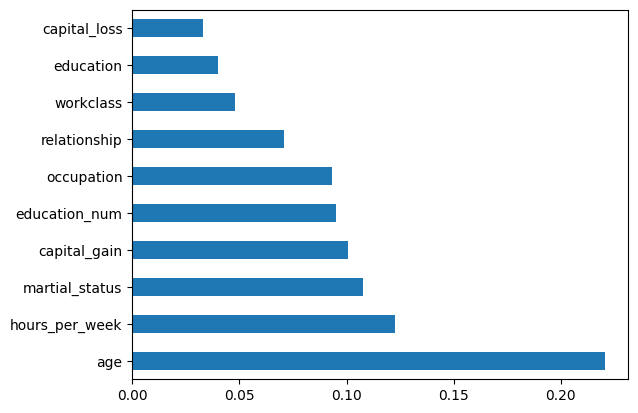

In [151]:
# Top 10
important_features.nlargest(10).plot(kind = 'barh')

In [ ]:
# Go ahead with all

In [152]:
skf = StratifiedKFold(n_splits=5)

In [153]:
for train_index, test_index in skf.split(x, y):
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [154]:
len(x_train) # 80% of data

26048

In [155]:
len(x_test) # 20% of data

6512

# Training

In [180]:
nb_model = GaussianNB()
dc_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()

In [179]:
nb_model.fit(x_train, y_train)
nb_y_pred = nb_model.predict(x_test)

In [178]:
dc_model.fit(x_train, y_train)
dc_y_pred = dc_model.predict(x_test)

In [177]:
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)

In [176]:
svc_model.fit(x_train, y_train)
svc_y_pred = svc_model.predict(x_test)

In [175]:
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)

In [182]:
lr_model.fit(x_train, y_train)
lr_y_pred = lr_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [184]:
final = pd.DataFrame({
    'Actual': y_test,
    'NBC': nb_y_pred,
    'DTC': dc_y_pred,
    'RFC': rf_y_pred,
    'SVC': svc_y_pred,
    'KNN': knn_y_pred,
    'LR': lr_y_pred,
})

In [185]:
final

,Actual,NBC,DTC,RFC,SVC,KNN,LR
26005,0,0,0,0,0,0,0
26006,0,0,1,1,0,1,1
26007,0,0,0,0,0,0,0
26008,0,0,0,0,0,0,0
26011,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
32555,0,0,0,0,0,1,1
32556,1,0,0,0,0,0,0
32557,0,0,0,0,0,0,0
32558,0,0,0,0,0,0,0


In [188]:
# Accuracy check, Options: accuracy_score or confusion_matrix

In [194]:
print(f'Naive Baye: {accuracy_score(y_test, nb_y_pred)}')
print(f'Decision Tree: {accuracy_score(y_test, dc_y_pred)}')
print(f'Random Forest: {accuracy_score(y_test, rf_y_pred)}')
print(f'Support Vector Classifier: {accuracy_score(y_test, svc_y_pred)}')
print(f'K Nearest Neighbors: {accuracy_score(y_test, knn_y_pred)}')
print(f'Logistic Regression: {accuracy_score(y_test, lr_y_pred)}')

Naive Baye: 0.8121928746928747
Decision Tree: 0.8181818181818182
Random Forest: 0.8562653562653563
Support Vector Classifier: 0.804514742014742
K Nearest Neighbors: 0.8468980343980343
Logistic Regression: 0.8295454545454546


In [ ]:
# Naive Baye: 0.8121928746928747 -> 81%
# Decision Tree: 0.8181818181818182 -> 82%
# Random Forest: 0.8562653562653563 -> 86%          Highest Accuracy
# Support Vector Classifier: 0.804514742014742 -> 80%
# K Nearest Neighbors: 0.8468980343980343 -> 85%
# Logistic Regression: 0.8295454545454546 -> 83%

For this dataaset Random Forest winner, Highest accuracy (Based on dataset (Always))